In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
%matplotlib inline

In [2]:
obesity = pd.read_csv(os.path.join("..","Data","Clean","US_Adults_Percent_Overweight_by_State_Year_Clean.csv"))
liver = pd.read_csv(os.path.join("..","Data","Clean","Liver_Disease_Cirrhosis_Mortality_Clean.csv"))
alc_use = pd.read_csv(os.path.join("..","Data","Clean","Alcohol_Use_Geo_Data_Clean.csv"))

In [3]:
obesity_df = pd.DataFrame(obesity)
liver_df = pd.DataFrame(liver)
alc_use_df = pd.DataFrame(alc_use)

In [4]:
obesity_df.head()

,Location,2013,2014,2015,2016,2017
0,United States,0.638,0.641,0.645,0.648,0.654
1,Alabama,0.682,0.670,0.687,0.695,0.702
2,Alaska,0.661,0.648,0.672,0.667,0.667
3,Arizona,0.618,0.640,0.653,0.632,0.648
4,Arkansas,0.699,0.706,0.695,0.682,0.705


In [5]:
liver_df.head()

,STATE,AVERAGE DEATH RATE,TOTAL DEATHS,2005 DEATH RATE,2005 DEATH COUNT,2014 DEATH RATE,2014 DEATH COUNT,2015 DEATH RATE,2015 DEATH COUNT,2016 DEATH RATE,2016 DEATH COUNT,2017 DEATH RATE,2017 DEATH COUNT,14 - 17 DEATH RATE CHANGE,14 - 17 DEATH RATE % CHANGE,14 - 17 DEATHS % CHANGE
0,AK,13.30,495,9.0,52,10.7,84,15.4,114,16.3,124,15.1,121,4.4,0.411215,0.440476
1,AL,11.98,3414,9.7,478,11.8,683,12.5,716,13.2,781,12.7,756,0.9,0.076271,0.106881
2,AR,10.62,1833,7.5,228,10.4,369,12.1,421,11.8,416,11.3,399,0.9,0.086538,0.081301
3,AZ,14.24,5305,12.7,757,14.3,1084,15.0,1149,14.9,1178,14.3,1137,0.0,0.000000,0.048893
4,CA,12.02,24872,11.1,3822,12.0,5013,12.7,5425,12.2,5287,12.1,5325,0.1,0.008333,0.062238


In [6]:
alc_use_df.head()

,Geographic/Socioeconomic Type,Geographic/Socioeconomic Characteristic,Lifetime Alcohol Use 2017 (K),Lifetime Alcohol Use 2018 (K),Past Year Alcohol Use 2017 (K),Past Year Alcohol Use 2018 (K),Past Month Alcohol Use 2017 (K),Past Month Alcohol Use 2018 (K),Past Month Binge Alcohol Use 2017 (K),Past Month Binge Alcohol Use 2018 (K),Past Month Heavy Alcohol Use 2017 (K),Past Month Heavy Alcohol Use 2018 (K),YOY % Change Heavy Use,YOY % Change Binge Use
0,Overall,TOTAL,204536,206099,165552,166459,133148,132688,62122,62737,15785,15708,-0.004878,0.009900
1,GEOGRAPHIC REGION,Northeast,37109,36594,31502,30672,25778,24862,11820,11491,2918,2883,-0.011995,-0.027834
2,GEOGRAPHIC REGION,Midwest,44429,44548,36183,36532,29227,29577,13938,14425,3724,3638,-0.023093,0.034940
3,GEOGRAPHIC REGION,South,74907,76328,58610,59621,46082,46308,21881,22354,5674,5430,-0.043003,0.021617
4,GEOGRAPHIC REGION,West,48091,48630,39257,39634,32061,31940,14484,14467,3468,3757,0.083333,-0.001174


In [7]:
obs_states_df = obesity_df.loc[obesity_df['Location'].isin(["California", "Colorado", "Oregon","Texas","Washington"])]
obs_states_df.head()
                                        

,Location,2013,2014,2015,2016,2017
5,California,0.601,0.597,0.604,0.610,0.609
6,Colorado,0.564,0.574,0.566,0.581,0.587
38,Oregon,0.599,0.617,0.645,0.626,0.645
44,Texas,0.661,0.678,0.687,0.684,0.694
48,Washington,0.614,0.634,0.625,0.635,0.622


In [8]:
# x_axis = list(obs_states_df.columns.values)
# x_axis

In [71]:
obs_st_df=obs_states_df.set_index('Location')
obs_st_df=obs_st_df.transpose()
obs_st_df = obs_st_df[['Texas','Oregon','Washington','California','Colorado']]
obs_st_df

Location,Texas,Oregon,Washington,California,Colorado
2013,0.661,0.599,0.614,0.601,0.564
2014,0.678,0.617,0.634,0.597,0.574
2015,0.687,0.645,0.625,0.604,0.566
2016,0.684,0.626,0.635,0.610,0.581
2017,0.694,0.645,0.622,0.609,0.587


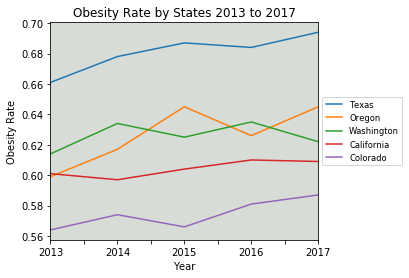

In [73]:
# ax = plt.axes()
# ax.set_facecolor("xkcd:light grey")
ax = obs_st_df.plot.line(title="Obesity Rate by States 2013 to 2017")
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(fontsize='small', loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_ylabel("Obesity Rate")
ax.set_xlabel("Year")
ax.set_facecolor("xkcd:light grey")
plt.savefig(os.path.join("..","Images","Obesity_Rates.png"),bbox_inches="tight")
plt.show()

In [45]:
liver_yearrate_df = liver_df.drop(['AVERAGE DEATH RATE',
'TOTAL DEATHS',
'2005 DEATH COUNT',
'2005 DEATH RATE',
'2014 DEATH COUNT',
'2015 DEATH COUNT',
'2016 DEATH COUNT',
'2017 DEATH COUNT',
'14 - 17 DEATH RATE CHANGE',
'14 - 17 DEATH RATE % CHANGE',
'14 - 17 DEATHS % CHANGE'], axis=1)
liver_yearrate_df = liver_yearrate_df.loc[liver_yearrate_df['STATE'].isin(["CA", "CO","OR","TX","WA"])]
liver_yearrate_df.rename(columns={'2014 DEATH RATE':'2014','2015 DEATH RATE':'2015','2016 DEATH RATE':'2016','2017 DEATH RATE':'2017'},inplace=True)
liver_yearrate_df.head()

,STATE,2014,2015,2016,2017
4,CA,12.0,12.7,12.2,12.1
5,CO,12.7,12.2,12.4,14.0
36,OR,12.8,13.7,12.2,12.6
42,TX,13.5,13.8,13.5,13.9
46,WA,11.1,12.4,11.1,11.4


In [67]:
liver_rate = liver_yearrate_df.set_index("STATE")
liver_rate = liver_rate.transpose()
liver_rate = liver_rate[['CO','TX','OR','CA','WA']]
liver_rate

STATE,CO,TX,OR,CA,WA
2014,12.7,13.5,12.8,12.0,11.1
2015,12.2,13.8,13.7,12.7,12.4
2016,12.4,13.5,12.2,12.2,11.1
2017,14.0,13.9,12.6,12.1,11.4


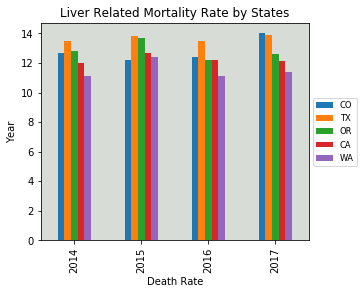

In [142]:
ax = liver_rate.plot.bar(title="Liver Related Mortality Rate by States")
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(fontsize='small', loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel("Death Rate")
ax.set_ylabel("Year")
ax.set_facecolor("xkcd:light grey")
plt.savefig(os.path.join("..","Images","Liver_Mortality_Rates.png"),bbox_inches="tight")
plt.show()

In [62]:
liver_yearcount_df = liver_df.drop(['AVERAGE DEATH RATE',
'TOTAL DEATHS',
'2005 DEATH COUNT',
'2005 DEATH RATE',
'2014 DEATH RATE',
'2015 DEATH RATE',
'2016 DEATH RATE',
'2017 DEATH RATE',
'14 - 17 DEATH RATE CHANGE',
'14 - 17 DEATH RATE % CHANGE',
'14 - 17 DEATHS % CHANGE'], axis=1)
liver_yearcount_df = liver_yearcount_df.loc[liver_yearcount_df['STATE'].isin(["CA", "CO","OR","TX","WA"])]
liver_yearcount_df.rename(columns={'2014 DEATH COUNT':'2014','2015 DEATH COUNT':'2015','2016 DEATH COUNT':'2016','2017 DEATH COUNT':'2017'},inplace=True)
liver_yearcount_df.head()

,STATE,2014,2015,2016,2017
4,CA,5013,5425,5287,5325
5,CO,743,735,751,865
36,OR,599,667,606,642
42,TX,3680,3844,3880,4107
46,WA,901,1024,926,982


In [65]:
liver_count = liver_yearcount_df.set_index("STATE")
liver_count = liver_count.transpose()
liver_count = liver_count[['CA','TX','WA','CO','OR']]
liver_count

STATE,CA,TX,WA,CO,OR
2014,5013,3680,901,743,599
2015,5425,3844,1024,735,667
2016,5287,3880,926,751,606
2017,5325,4107,982,865,642


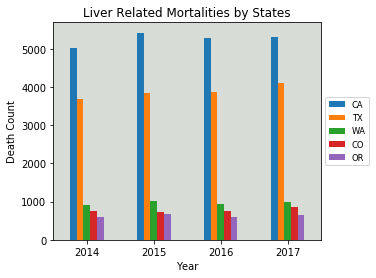

In [132]:
ax = liver_count.plot.bar(title="Liver Related Mortalities by States")
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(fontsize='small', loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xticklabels(ax.get_xticklabels(), rotation='0', horizontalalignment='center')
ax.set_xlabel("Year")
ax.set_ylabel("Death Count")
ax.set_facecolor("xkcd:light grey")
plt.savefig(os.path.join("..","Images","Liver_Mortality_Counts.png"),bbox_inches="tight")
plt.show()

In [137]:
us_wine = pd.read_csv(os.path.join("..","Data","Clean","us_wineries_2009_2019_clean.csv"))
us_wine_df = pd.DataFrame(us_wine)
us_wine_df

,year,number of wineries in US
0,2009,6357
1,2010,6941
2,2011,7306
3,2012,7396
4,2013,7498
5,2014,7762
6,2015,8287
7,2016,8702
8,2017,9091
9,2018,9654


In [138]:
us_wine_df['number of wineries in US'] = us_wine_df['number of wineries in US'].map('{:,}'.format)
us_wine_df['wineries'] = us_wine_df['number of wineries in US'].astype(str) + ' wineries'
us_wine_df

,year,number of wineries in US,wineries
0,2009,"6,357","6,357 wineries"
1,2010,"6,941","6,941 wineries"
2,2011,"7,306","7,306 wineries"
3,2012,"7,396","7,396 wineries"
4,2013,"7,498","7,498 wineries"
5,2014,"7,762","7,762 wineries"
6,2015,"8,287","8,287 wineries"
7,2016,"8,702","8,702 wineries"
8,2017,"9,091","9,091 wineries"
9,2018,"9,654","9,654 wineries"


In [139]:
year= []
winery_count= []

year = us_wine_df['year'].values
winery_count = us_wine_df['wineries'].values

C:\Users\steph\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # This is added back by InteractiveShellApp.init_path()


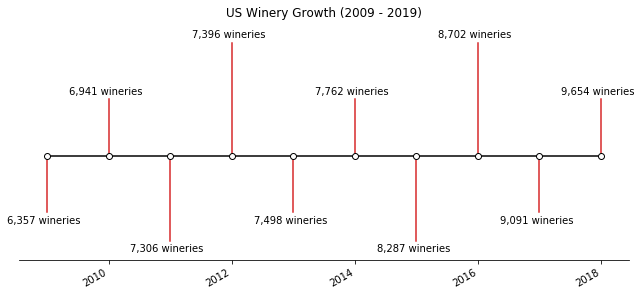

In [140]:
# Choose some nice levels
levels = np.tile([-1, 1, -1.5, 2, -1, 1,-1.5, 2, -1, 1],
                 int(np.ceil(len(year)/6)))[:len(year)]

# Create figure and plot a stem plot with the date
fig, ax = plt.subplots(figsize=(8.8, 4), constrained_layout=True)
ax.set(title="US Winery Growth (2009 - 2019)")

markerline, stemline, baseline = ax.stem(year, levels,
                                         linefmt="C3-", basefmt="k-",
                                         use_line_collection=False)

plt.setp(markerline, mec="k", mfc="w", zorder=3)

# Shift the markers to the baseline by replacing the y-data by zeros.
markerline.set_ydata(np.zeros(len(year)))

# annotate lines
vert = np.array(['top', 'bottom'])[(levels > 0).astype(int)]
for d, l, r, va in zip(year, levels, winery_count, vert):
    ax.annotate(r, xy=(d, l), xytext=(-3, np.sign(l)*3),
                textcoords="offset points", va=va, ha="center")

# format xaxis
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

# remove y axis and spines
ax.get_yaxis().set_visible(False)
for spine in ["left", "top", "right"]:
    ax.spines[spine].set_visible(False)
ax.margins(y=0.1)
plt.savefig(os.path.join("..","Images","US_Wineries_10yrs.png"),bbox_inches="tight")
plt.show()